In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
# Example time series data (replace with your own dataset)
np.random.seed(0)
dates = pd.date_range('2022-01-01', '2023-12-31', freq='D')
data = np.random.randn(len(dates)) + 10  # Random data
ts = pd.Series(data, index=dates)

In [3]:
# Fit SARIMA model
order = (1, 1, 1)      # Example order of SARIMA parameters
seasonal_order = (1, 1, 1, 12)  # Example seasonal order (seasonal period is 12 months)
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66405D+00    |proj g|=  2.52026D-01

At iterate    5    f=  1.44883D+00    |proj g|=  4.73668D-02

At iterate   10    f=  1.43659D+00    |proj g|=  4.45795D-03

At iterate   15    f=  1.43529D+00    |proj g|=  5.05229D-03

At iterate   20    f=  1.43518D+00    |proj g|=  1.91346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   3.111D-05   1.435D+00
  F =   

In [4]:
# Forecasting
forecast_steps = 120  # Example: forecast for the next 12 steps (next 12 months)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

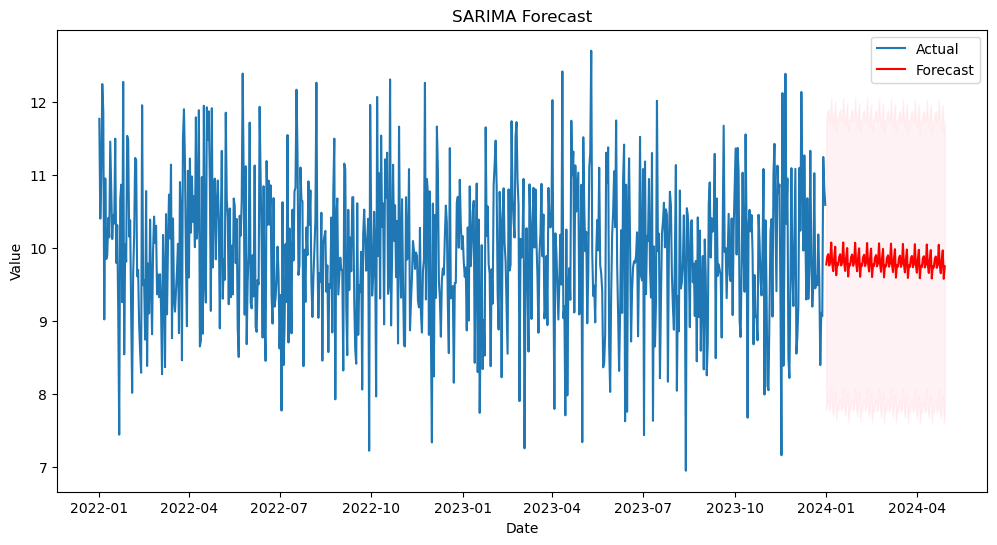

In [5]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2)
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [6]:
# Evaluate forecast (example using Mean Squared Error)
historical_data = ts['2022-01-01':'2023-12-31']  # Example: historical data used for forecasting
mse = mean_squared_error(historical_data[-forecast_steps:], forecast_mean)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.9983199846325835
